In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Convert to DataFrame for better visualization
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

Missing Values in Each Column:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


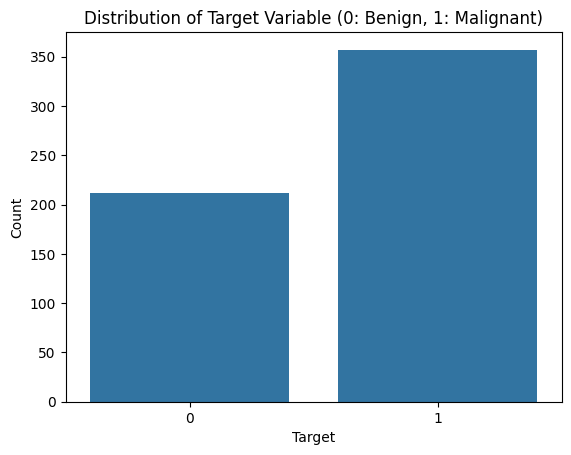

In [3]:
# Check for missing values
print("Missing Values in Each Column:")
print(df.isnull().sum())

# Visualize the distribution of the target variable
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable (0: Benign, 1: Malignant)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [4]:
# Split the data into features and target
X = df.drop('target', axis=1)  # Features (all columns except 'target')
y = df['target']              # Target (the 'target' column)

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the distribution of classes in the training set
print("Class distribution in the training set:")
print(y_train.value_counts())

Class distribution in the training set:
target
1    285
0    170
Name: count, dtype: int64


In [5]:
# Set class weights to handle imbalanced data
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}
print("\nClass Weights:")
print(class_weights_dict)


Class Weights:
{0: 1.338235294117647, 1: 0.7982456140350878}


<div style = "direction : rtl ;">

### Ensemble چیست و Random Forest چه رابطه‌ای با آن دارد؟



#### **Ensemble Learning:**
- **تعریف:**  
  Ensemble Learning یک روش در یادگیری ماشین است که در آن چندین مدل (معمولاً ضعیف) با هم ترکیب می‌شوند تا یک مدل قوی‌تر ایجاد کنند.

- **هدف:**  
  هدف از Ensemble Learning این است که با ترکیب نتایج چندین مدل، دقت و استحکام پیش‌بینی‌ها افزایش یابد و خطاهای مدل‌های فردی کاهش پیدا کند.

- **مزایا:**  
  - کاهش Overfitting (بیش‌برازش).  
  - بهبود دقت و عملکرد مدل.  
  - مقاوم‌تر شدن مدل در برابر داده‌های نویزی.

#### **انواع Ensemble Methods:**

1. **Bagging (Bootstrap Aggregating):**  
   - در این روش، چندین مدل از نوع مشابه (معمولاً درخت تصمیم) روی زیرمجموعه‌های مختلف داده‌ها آموزش داده می‌شوند.  
   - نتایج مدل‌ها با هم ترکیب می‌شوند (معمولاً با رای‌گیری یا میانگین‌گیری).  
   - **مثال:** Random Forest.

2. **Boosting:**  
   - در این روش، مدل‌ها به صورت ترتیبی آموزش داده می‌شوند و هر مدل سعی می‌کند خطاهای مدل قبلی را اصلاح کند.  
   - **مثال:** Gradient Boosting, XGBoost, LightGBM.

3. **Stacking:**  
   - در این روش، خروجی چندین مدل به عنوان ورودی برای یک مدل نهایی (Meta-model) استفاده می‌شود.

   </div>

In [6]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Build the Random Forest model with class weights
rf_model = RandomForestClassifier(random_state=42, class_weight=class_weights_dict)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[39  3]
 [ 3 69]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Accuracy Score:
0.9473684210526315


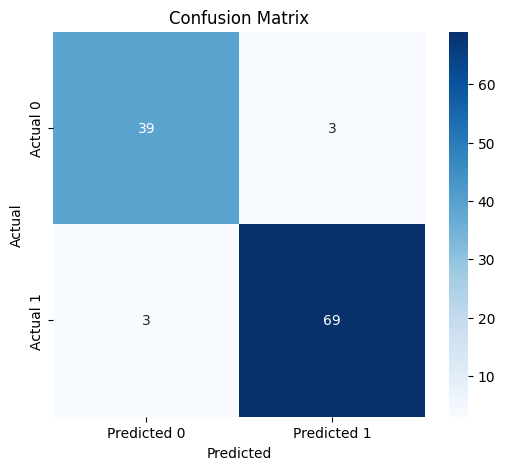

In [7]:
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [9]:
# Import necessary libraries
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Build the XGBoost model with class weights
xgb_model = xgb.XGBClassifier(random_state=42, scale_pos_weight=class_weights_dict[1] / class_weights_dict[0])

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

print("Accuracy Score (XGBoost):")
print(accuracy_score(y_test, y_pred_xgb))

Confusion Matrix (XGBoost):
[[38  4]
 [ 0 72]]

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        42
           1       0.95      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy Score (XGBoost):
0.9649122807017544


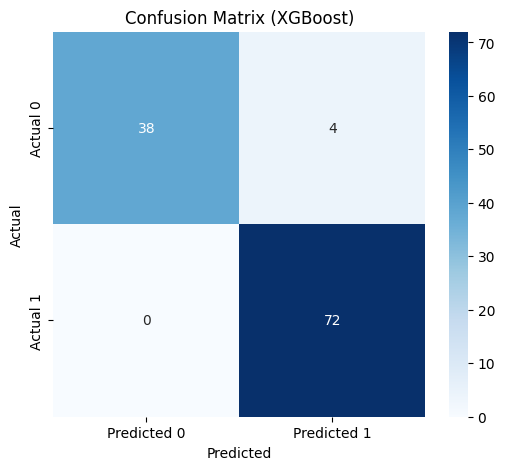

In [10]:
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
!pip install lightgbm

In [ ]:
# Import necessary libraries
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Build the LightGBM model with class weights
lgb_model = lgb.LGBMClassifier(random_state=42, scale_pos_weight=class_weights_dict[1] / class_weights_dict[0])

# Train the model on the training data
lgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix (LightGBM):")
print(confusion_matrix(y_test, y_pred_lgb))

print("\nClassification Report (LightGBM):")
print(classification_report(y_test, y_pred_lgb))

print("Accuracy Score (LightGBM):")
print(accuracy_score(y_test, y_pred_lgb))

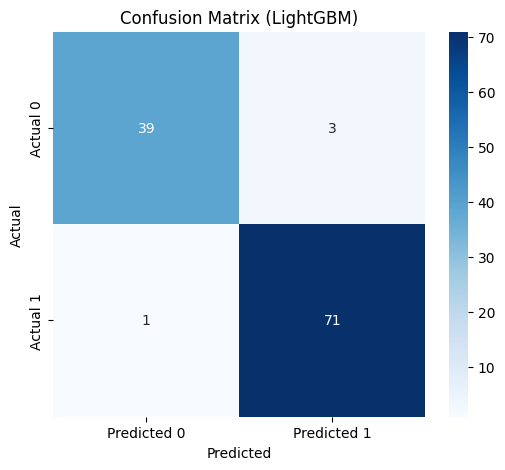

In [16]:
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm_lgb = confusion_matrix(y_test, y_pred_lgb)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (LightGBM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Model Comparison Summary:

| **Model**         | **Accuracy** | **Precision (Class 0)** | **Recall (Class 1)** | **F1-Score (Class 1)** |
|--------------------|--------------|--------------------------|-----------------------|-------------------------|
| **Random Forest**  | 95.0%        | 93%                     | 96%                  | 0.96                   |
| **XGBoost**        | **96.5%**    | **100%**                | **100%**             | **0.97**               |
| **LightGBM**       | **96.5%**    | 97%                     | 99%                  | 0.97                   |

- **Best Model:**  
  - **XGBoost** and **LightGBM** outperform Random Forest.  
  - **XGBoost** is better for precision on Class 0.  
  - **LightGBM** is faster and slightly better for recall on Class 1.